In [8]:
from alignment import Alignment, Camera, Photo,CalibrationSquareObservation
import numpy as np
from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class AlignmentStationaryMarkers(Alignment):
    def addmissingobs(self):
        #we add synthetic observations here to see how well it does...
        for code,calsqr in self.calsquares.items():
            for photo in self.photos:
                if photo not in [obs.photo for obs in calsqr.observations]:
                    obs = CalibrationSquareObservation(calsqr,photo)
                    calsqr.observations.append(obs)
                    photo.observations.append(obs)
        
    def __init__(self,imgfiles):
        self.photos = []
        self.calsquares = {}
        self.cameras = []

        for fn in imgfiles:
            cam = Camera() 
            self.cameras.append(cam)
            data = np.load(fn,allow_pickle=True)
            image = data['img'].astype(float)
            photo = Photo(cam,image)
            photo.decode(self.calsquares,max_count=6)
            self.photos.append(photo)

    def draw(self):
        for i,photo in enumerate(self.photos):
            plt.subplot(1+len(self.photos)//3,3,i+1)
            photo.draw()
            plt.xlim([0,2048])
            plt.ylim([1536,0])

In [3]:
imgfiles = glob('demo_multitag1/*.np')[:7]
alignment = AlignmentStationaryMarkers(imgfiles)

In [6]:
alignment.firstpass()
alignment.secondpass()
alignment.addmissingobs()

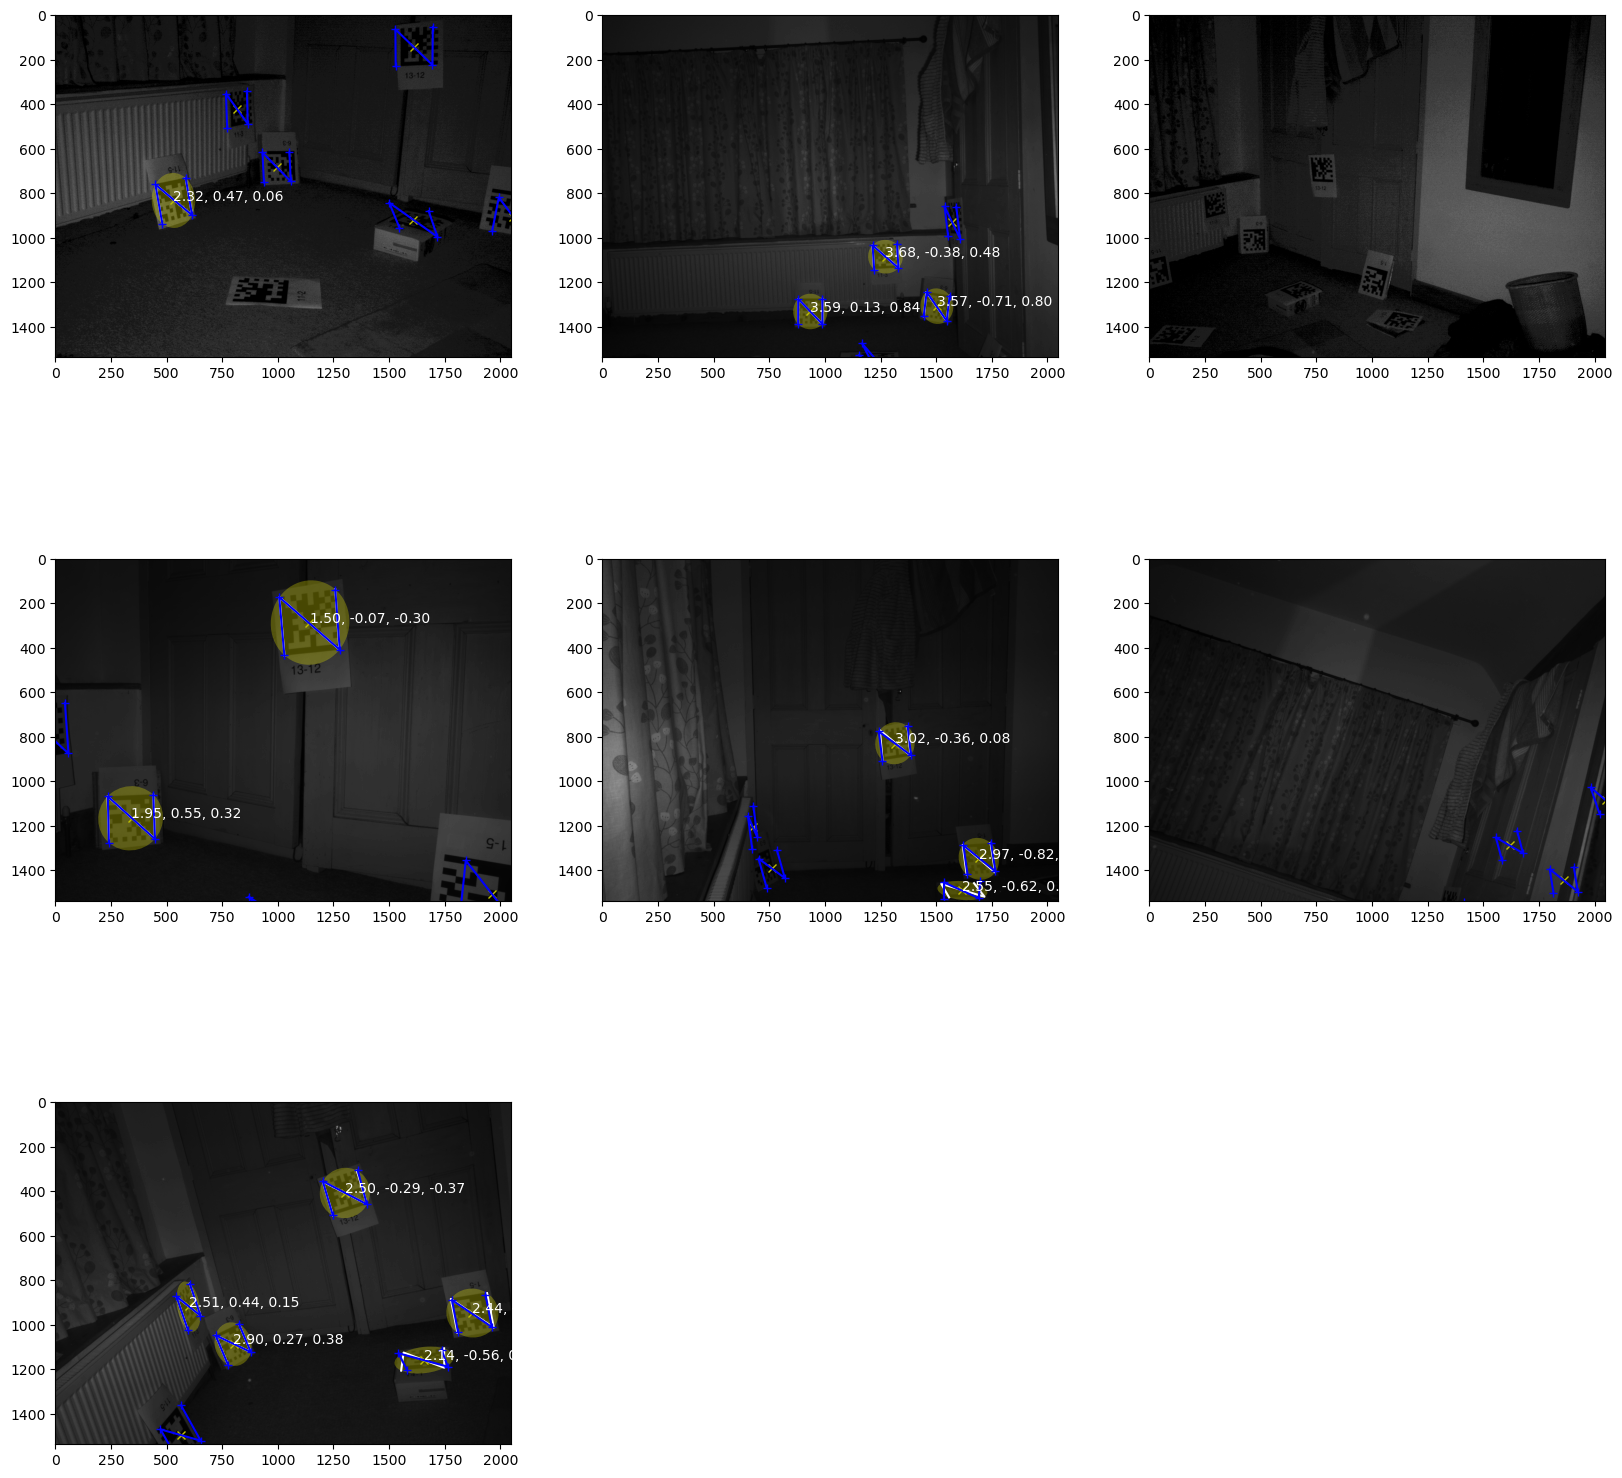

In [9]:
plt.figure(figsize=[20,20])
alignment.draw()